In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts/")
from clean_data import DataCleaner
from utils import Utils
cleaner=DataCleaner()
utility=Utils()
save_data_to="../data/"
reaad_data_from="../data/"

In [24]:
def load_data(path):
    """
    Load data from a csv file
    """
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        print("File not found.")

    return df

In [25]:
df=load_data("../data/Week1_challenge_data_source(CSV).csv")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Cleaning Process

In [26]:
df = cleaner.drop_duplicate(df)
# remove white spaces from col names
df=cleaner.remove_whitespace_column(df)
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [28]:
# convert datetime cols to appropriate data type : datetime
df=cleaner.convert_to_datetime(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 149010 non-null  float64       
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

In [29]:
# convert 'bearer_id', 'imsi', 'msisdn/number', 'imei','handset_type' to string
df = cleaner.convert_to_string(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      150001 non-null  object        
 7   msisdn/number                             150001 non-null  object        
 8   imei                                      150001 non-null  object        
 9   last_location_n

### handle missing values

In [30]:
df.isnull().sum()

bearer_id                                        0
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
dur._(ms)                                        1
imsi                                             0
msisdn/number                                    0
imei                                             0
last_location_name                            1153
avg_rtt_dl_(ms)                              27829
avg_rtt_ul_(ms)                              27812
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  88146
tcp_ul_retrans._vol_(bytes)                  96649
dl_tp_<_50_kbps_(%)                            754
50_kbps_<_dl_tp_<_250_kbps_(%)                 754
250_kbps_<_dl_tp_<_1_mbps_(%)                  754
dl_tp_>_1_mbps_(%)             

In [31]:
percentage=cleaner.percent_missing(df)
print(f"{percentage}% of the data is missing or null")

12.46% of the data is missing or null


#### Fill missing data
- Categorical columns will be filled using mode() / frequent values
- numerical columns can be filled with either median or mean
    - for numerical columns the decision to use which method will be determined by observing the skewness of the data
    - When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data.


#### checking for skew
- 0 means No skew
- +ve value means right skew
- -ve value means left skew

In [32]:
# get all numerical columns and name them features
skew_data=pd.DataFrame(data=cleaner.get_numerical_columns(df),columns=["Features"])
# get skew value for each column
skew_data["Skew"]=list(df[cleaner.get_numerical_columns(df)].skew())
# we don't care the direction of the skew (can be left skewed or right skewed) we only want its magnitude thus we take the absolute value of the skew
skew_data["Absolute Skew"] = skew_data["Skew"].abs()
# we say a data is skewed if its absolute value is greater than .5
skew_data["Skewed"] = skew_data["Absolute Skew"].apply(lambda x : True if x>=0.5 else False) 
skew_data


,Features,Skew,Absolute Skew,Skewed
0,start_ms,0.000968,0.000968,False
1,end_ms,-0.001163,0.001163,False
2,dur._(ms),3.952609,3.952609,True
3,avg_rtt_dl_(ms),62.907828,62.907828,True
4,avg_rtt_ul_(ms),28.457415,28.457415,True
5,avg_bearer_tp_dl_(kbps),2.589437,2.589437,True
6,avg_bearer_tp_ul_(kbps),4.503413,4.503413,True
7,tcp_dl_retrans._vol_(bytes),15.951809,15.951809,True
8,tcp_ul_retrans._vol_(bytes),84.113393,84.113393,True
9,dl_tp_<_50_kbps_(%),-2.297803,2.297803,True


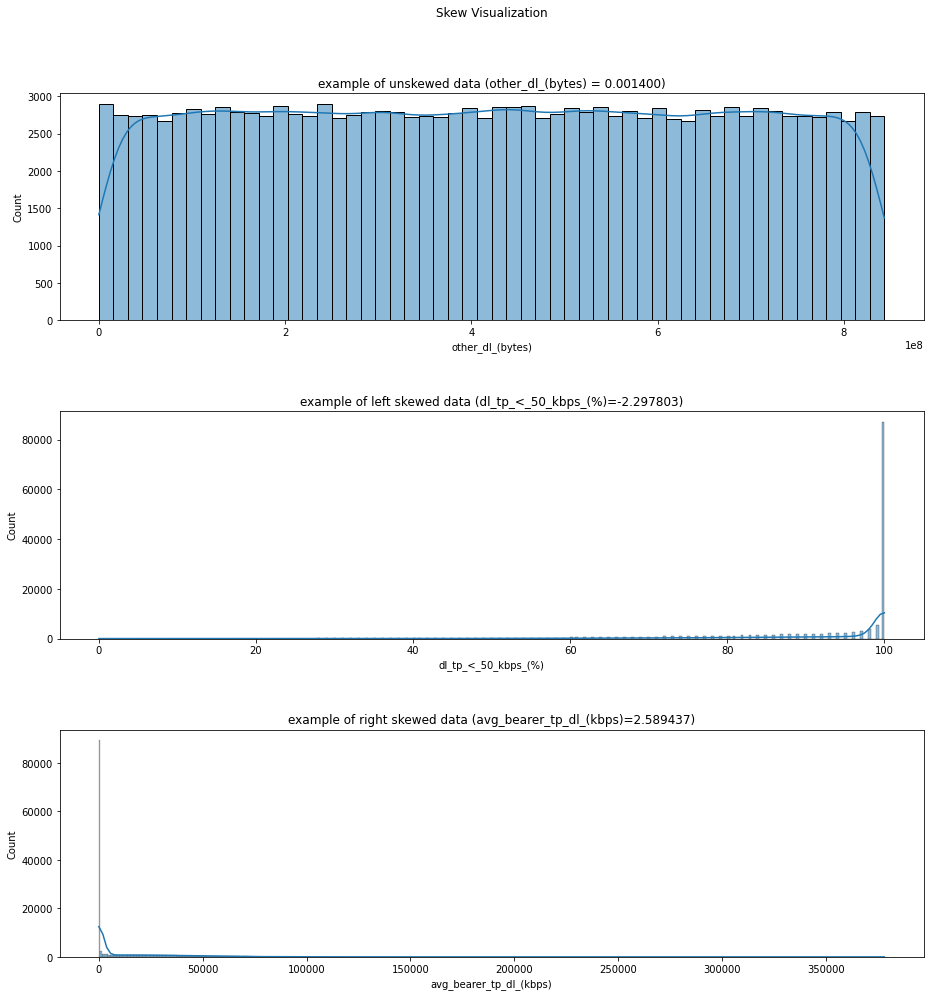

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15),sharex=True)
plt.subplot(3,1,1,title="example of unskewed data (other_dl_(bytes) = 0.001400)")
sns.histplot(df["other_dl_(bytes)"],kde=True)
plt.subplot(3,1,2,title="example of left skewed data (dl_tp_<_50_kbps_(%)=-2.297803)")
sns.histplot(df["dl_tp_<_50_kbps_(%)"],kde=True)
plt.subplot(3,1,3,title="example of right skewed data (avg_bearer_tp_dl_(kbps)=2.589437)")
sns.histplot(df["avg_bearer_tp_dl_(kbps)"],kde=True)
plt.suptitle("Skew Visualization")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [34]:
# get skewed column names 
skewed_features= skew_data.query("Skewed") # this is equivalent to skewed_features= skew_data.query("Skewed == True ")
skewed_features["Features"]

2                                    dur._(ms)
3                              avg_rtt_dl_(ms)
4                              avg_rtt_ul_(ms)
5                      avg_bearer_tp_dl_(kbps)
6                      avg_bearer_tp_ul_(kbps)
7                  tcp_dl_retrans._vol_(bytes)
8                  tcp_ul_retrans._vol_(bytes)
9                          dl_tp_<_50_kbps_(%)
10              50_kbps_<_dl_tp_<_250_kbps_(%)
11               250_kbps_<_dl_tp_<_1_mbps_(%)
12                          dl_tp_>_1_mbps_(%)
13                         ul_tp_<_10_kbps_(%)
14               10_kbps_<_ul_tp_<_50_kbps_(%)
15              50_kbps_<_ul_tp_<_300_kbps_(%)
16                        ul_tp_>_300_kbps_(%)
17                             http_dl_(bytes)
18                             http_ul_(bytes)
19                   activity_duration_dl_(ms)
20                   activity_duration_ul_(ms)
21                                 dur._(ms).1
22             nb_of_sec_with_125000b_<_vol_dl
23       nb_o

In [35]:
unskewed_features=skew_data.query("Skewed == False")
unskewed_features["Features"]

0                    start_ms
1                      end_ms
30    social_media_dl_(bytes)
31    social_media_ul_(bytes)
32          google_dl_(bytes)
33          google_ul_(bytes)
34           email_dl_(bytes)
35           email_ul_(bytes)
36         youtube_dl_(bytes)
37         youtube_ul_(bytes)
38         netflix_dl_(bytes)
39         netflix_ul_(bytes)
40          gaming_dl_(bytes)
41          gaming_ul_(bytes)
42           other_dl_(bytes)
43           other_ul_(bytes)
44           total_ul_(bytes)
45           total_dl_(bytes)
Name: Features, dtype: object

In [36]:
unskewed_features = list(unskewed_features["Features"])
skewed_features = list(skewed_features["Features"])

# it is safe to use mean method for unskewed_features
df=cleaner.fill_missing_values_numeric(df,"mean",unskewed_features)

# it is recomended to use median method for skewed_features
df=cleaner.fill_missing_values_numeric(df,"median",skewed_features)


In [37]:
# proceed with categorical values
df = cleaner.fill_missing_values_categorical(df,"mode")

In [38]:
df.isnull().sum()

bearer_id                                   0
start                                       0
start_ms                                    0
end                                         0
end_ms                                      0
dur._(ms)                                   0
imsi                                        0
msisdn/number                               0
imei                                        0
last_location_name                          0
avg_rtt_dl_(ms)                             0
avg_rtt_ul_(ms)                             0
avg_bearer_tp_dl_(kbps)                     0
avg_bearer_tp_ul_(kbps)                     0
tcp_dl_retrans._vol_(bytes)                 0
tcp_ul_retrans._vol_(bytes)                 0
dl_tp_<_50_kbps_(%)                         0
50_kbps_<_dl_tp_<_250_kbps_(%)              0
250_kbps_<_dl_tp_<_1_mbps_(%)               0
dl_tp_>_1_mbps_(%)                          0
ul_tp_<_10_kbps_(%)                         0
10_kbps_<_ul_tp_<_50_kbps_(%)     

In [39]:
percentage_after_fill=cleaner.percent_missing(df)
print(f"{percentage_after_fill}% of the data is missing or null")

0.0% of the data is missing or null


In [40]:
utility.save_data(df,f"{save_data_to}cleaned_data.csv")

Data saved successfully!
